# [Model] Data Analytics Test - iFood
###### [By Israel Mendes](https://github.com/israelmendez232)

This notebook were generated locally, because of the complexity to run the models that won't work for the [Databricks](https://databricks.com/) Community Edition.

The main library used here is [PyCaret](https://pycaret.readthedocs.io/en/latest/) to generate the model and tuning, because is very pratical and productive. The summary:
1. Train the model and explorations;
2. Validate the results and save the model;
3. Avaluate the return;
4. [EXTRA] Results

## 1. Train the model
Bring more explorations.

In [1]:
import pandas as pd
from pycaret.classification import *

df = pd.read_csv("../data/data_analytics_cleaned.csv") 

df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [2]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.0,2213.0,2213.000000
mean,5586.899232,1968.917307,52236.581563,0.441934,0.505648,49.007682,305.153638,26.323995,166.962494,37.635337,27.034794,43.911432,2.325350,4.087664,2.671487,5.805242,5.321735,0.073656,0.074108,0.072752,0.064166,0.013556,0.009038,3.0,11.0,0.150474
std,3247.819194,11.700216,25178.603047,0.536965,0.544236,28.941864,337.305490,39.735932,224.226178,54.763278,41.085433,51.699746,1.924402,2.741664,2.927096,3.250752,2.425092,0.261269,0.262005,0.259788,0.245104,0.115666,0.094657,0.0,0.0,0.357617
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2815.000000,1959.000000,35246.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8420.000000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [3]:
df_train = df.sample(frac = 0.9, random_state = 786)
df_prediction = df.drop(df_train.index)

df_train.reset_index(drop = True, inplace = True)
df_prediction.reset_index(drop = True, inplace = True)

print('Data for Training/Modeling: ' + str(df_train.shape))
print('Data For Predictions: ' + str(df_prediction.shape))

Data for Training/Modeling: (1992, 29)
Data For Predictions: (221, 29)


In [4]:
# Setup for the classification model
setup_sample = setup(df_train, target = 'Response')

,Description,Value
0,session_id,554
1,Target,Response
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1992, 29)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
# Compare different models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8809,0.0000,0.6656,0.8679,0.8644,0.4108,0.4417,0.0140
catboost,CatBoost Classifier,0.8802,0.8755,0.6450,0.8659,0.8588,0.3764,0.4191,2.5140
xgboost,Extreme Gradient Boosting,0.8788,0.8810,0.6779,0.8655,0.8657,0.4241,0.4441,0.2420
et,Extra Trees Classifier,0.8759,0.8557,0.6203,0.8611,0.8492,0.3262,0.3819,0.1040
gbc,Gradient Boosting Classifier,0.8738,0.8615,0.6550,0.8576,0.8574,0.3817,0.4070,0.1460
lda,Linear Discriminant Analysis,0.8738,0.8745,0.7054,0.8635,0.8671,0.4493,0.4537,0.0150
lightgbm,Light Gradient Boosting Machine,0.8738,0.8734,0.6574,0.8582,0.8579,0.3863,0.4108,0.0530
ada,Ada Boost Classifier,0.8723,0.8346,0.6767,0.8584,0.8608,0.4097,0.4235,0.0580
rf,Random Forest Classifier,0.8716,0.8715,0.6040,0.8571,0.8412,0.2871,0.3493,0.1180
lr,Logistic Regression,0.8544,0.7777,0.5677,0.8301,0.8175,0.1799,0.2325,0.3050


In [6]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8929,0.9268,0.6625,0.8911,0.8716,0.4361,0.4999
1,0.8714,0.8547,0.6303,0.8527,0.8488,0.3407,0.3793
2,0.8714,0.8900,0.6499,0.8532,0.8539,0.3728,0.3977
3,0.9000,0.9260,0.6863,0.8990,0.8824,0.4872,0.5424
4,0.9065,0.8567,0.7166,0.9003,0.8946,0.5330,0.5632
5,0.8777,0.9412,0.6374,0.8598,0.8572,0.3563,0.3919
6,0.8777,0.7567,0.6582,0.8607,0.8622,0.3892,0.4113
7,0.8633,0.8290,0.5874,0.8346,0.8339,0.2396,0.2805
8,0.8561,0.8325,0.5825,0.8259,0.8242,0.2273,0.2703
9,0.8849,0.9411,0.6386,0.8819,0.8593,0.3819,0.4540


In [24]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8929,0.9364,0.6821,0.8850,0.8762,0.4643,0.5049
1,0.8643,0.8964,0.6653,0.8480,0.8527,0.3831,0.3934
2,0.8643,0.8852,0.6849,0.8521,0.8565,0.4099,0.4150
3,0.9000,0.9432,0.7451,0.8920,0.8929,0.5556,0.5659
4,0.8777,0.8521,0.6790,0.8631,0.8665,0.4190,0.4315
5,0.8705,0.9092,0.6332,0.8495,0.8515,0.3363,0.3618
6,0.8777,0.7912,0.6998,0.8665,0.8702,0.4460,0.4520
7,0.8849,0.8513,0.6624,0.8706,0.8680,0.4101,0.4412
8,0.8633,0.8051,0.6455,0.8435,0.8472,0.3532,0.3710
9,0.8921,0.9403,0.6820,0.8842,0.8753,0.4639,0.5045


In [8]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8786,0.9000,0.7325,0.8720,0.8747,0.4940,0.4960
1,0.8929,0.8547,0.7605,0.8873,0.8894,0.5536,0.5558
2,0.8500,0.8944,0.6569,0.8359,0.8414,0.3478,0.3521
3,0.8643,0.9068,0.6849,0.8521,0.8565,0.4099,0.4150
4,0.8705,0.9118,0.6956,0.8605,0.8644,0.4267,0.4302
5,0.8921,0.9063,0.7290,0.8830,0.8855,0.5111,0.5181
6,0.8849,0.7563,0.7248,0.8764,0.8794,0.4904,0.4944
7,0.8777,0.8618,0.7206,0.8706,0.8735,0.4705,0.4726
8,0.8489,0.8281,0.6370,0.8294,0.8360,0.3175,0.3261
9,0.8777,0.9249,0.7127,0.8674,0.8707,0.4715,0.4773


In [9]:
# Tune Hyperparameters
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8857,0.9220,0.6387,0.8827,0.8603,0.3822,0.4543
1,0.8714,0.8583,0.6106,0.8549,0.8429,0.3050,0.3625
2,0.8786,0.8832,0.6737,0.8637,0.8642,0.4218,0.4430
3,0.8929,0.9196,0.6625,0.8911,0.8716,0.4361,0.4999
4,0.8993,0.8340,0.6916,0.8916,0.8845,0.4838,0.5205
5,0.8993,0.9357,0.6916,0.8916,0.8845,0.4838,0.5205
6,0.8993,0.7546,0.6916,0.8916,0.8845,0.4838,0.5205
7,0.8921,0.8261,0.6458,0.8886,0.8689,0.3997,0.4680
8,0.8561,0.8132,0.5825,0.8259,0.8242,0.2273,0.2703
9,0.8921,0.9395,0.6624,0.8904,0.8707,0.4357,0.4995


In [25]:
# Tune Hyperparameters
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8857,0.9304,0.6779,0.8734,0.8702,0.4425,0.4721
1,0.8786,0.8792,0.7325,0.8720,0.8747,0.4940,0.4960
2,0.8429,0.8727,0.6527,0.8308,0.8359,0.3313,0.3338
3,0.8929,0.9160,0.7605,0.8873,0.8894,0.5536,0.5558
4,0.8849,0.8479,0.7040,0.8733,0.8762,0.4662,0.4758
5,0.9137,0.9286,0.8040,0.9105,0.9118,0.6344,0.6356
6,0.8489,0.7441,0.6622,0.8396,0.8437,0.3460,0.3475
7,0.8777,0.8282,0.6998,0.8665,0.8702,0.4460,0.4520
8,0.8345,0.7942,0.6285,0.8184,0.8251,0.2849,0.2885
9,0.9137,0.9407,0.7730,0.9082,0.9075,0.6187,0.6302


In [11]:
# Tune Hyperparameters
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8786,0.9000,0.7325,0.8720,0.8747,0.4940,0.4960
1,0.8857,0.8631,0.7367,0.8780,0.8806,0.5137,0.5175
2,0.8571,0.8948,0.7003,0.8517,0.8542,0.4169,0.4176
3,0.8714,0.9092,0.6695,0.8553,0.8584,0.4020,0.4170
4,0.8921,0.9223,0.7082,0.8810,0.8822,0.4873,0.5019
5,0.9137,0.9525,0.7624,0.9075,0.9071,0.5996,0.6120
6,0.8777,0.7307,0.6998,0.8665,0.8702,0.4460,0.4520
7,0.8777,0.8735,0.6998,0.8665,0.8702,0.4460,0.4520
8,0.8417,0.8305,0.6523,0.8296,0.8347,0.3306,0.3330
9,0.9065,0.9173,0.7492,0.8997,0.8985,0.5775,0.5931


In [26]:
# Blending the models
blender = blend_models(estimator_list = [tuned_catboost, tuned_xgboost, tuned_lda], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8786,0.9228,0.6933,0.8655,0.8682,0.4481,0.4601
1,0.8857,0.8772,0.7171,0.8752,0.8776,0.4921,0.5012
2,0.8643,0.8892,0.6653,0.8480,0.8527,0.3831,0.3934
3,0.8857,0.9244,0.6975,0.8735,0.8741,0.4684,0.4859
4,0.8993,0.8794,0.7332,0.8904,0.8916,0.5329,0.5439
5,0.9209,0.9471,0.7874,0.9160,0.9160,0.6415,0.6502
6,0.8777,0.7609,0.6790,0.8631,0.8665,0.4190,0.4315
7,0.8633,0.8420,0.6498,0.8453,0.8508,0.3506,0.3611
8,0.8417,0.8232,0.6132,0.8176,0.8257,0.2684,0.2785
9,0.8993,0.9483,0.6862,0.8983,0.8816,0.4868,0.5421


In [27]:
stacker = stack_models(estimator_list = [tuned_catboost, tuned_xgboost, tuned_lda], meta_model=catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8857,0.9236,0.6975,0.8735,0.8741,0.4684,0.4859
1,0.8929,0.8892,0.7213,0.8829,0.8837,0.5130,0.5268
2,0.8571,0.8952,0.6611,0.8416,0.8470,0.3651,0.3719
3,0.8929,0.9296,0.7409,0.8846,0.8867,0.5342,0.5407
4,0.8993,0.8790,0.7124,0.8899,0.8883,0.5096,0.5308
5,0.9065,0.9424,0.7374,0.8989,0.8979,0.5557,0.5723
6,0.8705,0.7676,0.6748,0.8561,0.8607,0.3994,0.4077
7,0.8993,0.8630,0.7332,0.8904,0.8916,0.5329,0.5439
8,0.8633,0.8418,0.6455,0.8435,0.8472,0.3532,0.3710
9,0.8993,0.9572,0.7058,0.8929,0.8856,0.5118,0.5461


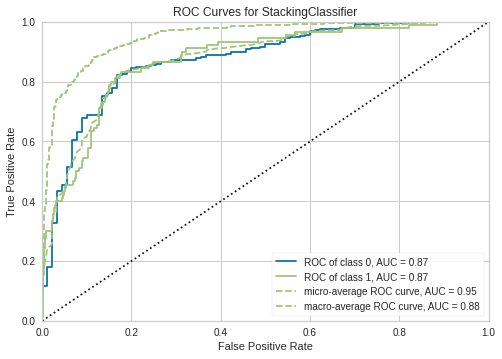

In [30]:
plot_model(stacker)

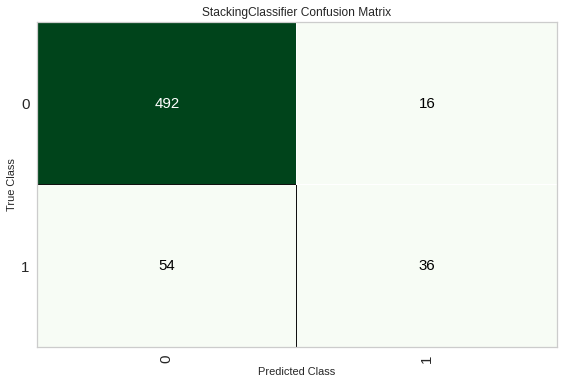

In [31]:
plot_model(stacker, plot = 'confusion_matrix')

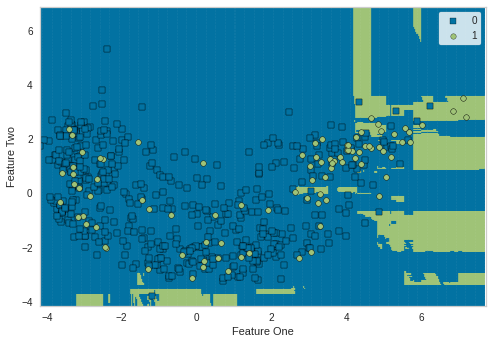

In [32]:
plot_model(stacker, plot = 'boundary')

## 2. Validate the results
Save the model

In [49]:
predict_new = predict_model(stacker, data = df_prediction)
predict_new.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Label,Score
216,4418,1983,Master,Single,89616.0,0,0,2013-02-25,36,671,...,0,0,0,0,0,3,11,1,0,0.8784
217,1092,1980,Graduation,Married,61014.0,0,1,2012-08-11,17,269,...,0,0,0,0,0,3,11,0,0,0.9210
218,1448,1963,Master,Married,33562.0,1,2,2014-06-25,33,21,...,0,0,0,0,0,3,11,0,0,0.9951
219,4286,1970,PhD,Single,57642.0,0,1,2014-01-09,24,580,...,0,0,0,0,0,3,11,0,0,0.5844
220,4749,1968,Graduation,Together,58554.0,1,1,2012-09-26,55,368,...,0,0,0,0,0,3,11,0,0,0.9810


In [51]:
predict_new['result'] = predict_new['Response'] == predict_new['Label']
predict_new.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Label,Score,result
216,4418,1983,Master,Single,89616.0,0,0,2013-02-25,36,671,...,0,0,0,0,3,11,1,0,0.8784,False
217,1092,1980,Graduation,Married,61014.0,0,1,2012-08-11,17,269,...,0,0,0,0,3,11,0,0,0.9210,True
218,1448,1963,Master,Married,33562.0,1,2,2014-06-25,33,21,...,0,0,0,0,3,11,0,0,0.9951,True
219,4286,1970,PhD,Single,57642.0,0,1,2014-01-09,24,580,...,0,0,0,0,3,11,0,0,0.5844,True
220,4749,1968,Graduation,Together,58554.0,1,1,2012-09-26,55,368,...,0,0,0,0,3,11,0,0,0.9810,True


In [52]:
lost = predict_new[predict_new['result'] == False]['result'].count()
won = predict_new[predict_new['result'] == True]['result'].count()
end_result = won / (won + lost)

print(f"Right predictions: {won}")
print(f"Wrong predictions: {lost}")
print(f"End result in % of the predictions: {end_result}")

Right predictions: 193
Wrong predictions: 28
End result in % of the predictions: 0.8733031674208145


In [53]:
save_model(best, model_name='end-classifier-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Response',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                                                 silent=True,
                                                                 subsample=1.0,
                                                                 subsample_for_bin=200000,
                         

## 3. Avaluate the return
Now it's time to validate if the insights are accurate based on the **prediction sample**. Main points to avaluate:
 - Prove that the insight could have a **campaign rate beyond 15%**, which was the standart for this campaign;
 - Considering the 6.720MU spended on this "sample", with 2.213 (not counting the null and outliers). This campaign has **invested 3.03MU/customer**;
 - The **total received** by each Response was: 3.674MU / 333 (not counting the null and outliers) => **11.03MU/customer**;
 - To be sucessful, the **campaign rate needs to be 28% or higher** (3.03 / 11.03) based on the cost and return over customer;
 - The **R.O.I.** was (3.674MU / 6.720MU) - 1 => **-45,32%**;
 
Since we can't change the price or the campaign, we can focus more on segmentation and the historical data of those customers. And to provide better insights to overcame the standart elements mentioned earlier.

In [56]:
# Considering we will only impactate the customers that were predicted as 1, avoing the 0 ones.
validation = predict_new.copy()
validation = validation[validation['Label'] == 1]
validation.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Label,Score,result
7,7503,1976,Graduation,Single,75825.0,0,0,2012-10-12,40,1032,...,0,0,0,0,3,11,1,1,0.7076,True
20,2877,1974,Master,Together,46014.0,1,1,2013-01-21,21,410,...,0,0,0,0,3,11,0,1,0.5528,False
34,2521,1971,Master,Married,35178.0,1,0,2013-01-10,10,23,...,0,0,0,0,3,11,1,1,0.8536,True
44,4216,1981,Graduation,Single,91065.0,0,0,2013-02-22,33,822,...,1,1,0,0,3,11,1,1,0.9228,True
63,7141,1986,Master,Single,21888.0,1,0,2012-12-29,15,88,...,0,0,0,0,3,11,1,1,0.5409,True


In [65]:
base_total_customers = predict_new['result'].count()
customers_impactated = validation['result'].count()
rel_customers_imp_total_base = customers_impactated / base_total_customers
customers_positive = validation[predict_new['result'] == True]['result'].count()


total_spend = customers_impactated * 3.03 
total_return = customers_positive * 11.03

campaign_rate = customers_positive / customers_impactated
roi = (total_return / total_spend) - 1

print(f"Total customers impactated: {customers_impactated}")
print(f"Customers impactated and positive response: {customers_positive}")
print(f"Customers impactated / total customers: {rel_customers_imp_total_base}")
print(f"Total spend on campaign: {total_spend}")
print(f"Total return on the campaign: {total_return}")
print(f"Campaign rate: {campaign_rate}")
print(f"ROI: {roi}")

Total customers impactated: 17
Customers impactated and positive response: 13
Customers impactated / total customers: 0.07692307692307693
Total spend on campaign: 51.51
Total return on the campaign: 143.39
Campaign rate: 0.7647058823529411
ROI: 1.7837313143079014


## [EXTRA] Results

The model was responsable to:
- Increase the **Campaign Rate** to 15% up to **76.5%**;
- Deliver a **ROI** to **+178.37%**, compared to -45,32% of the starndart campaign.

---

If we extrapolate the results from this model, it would generate the following results in the whole base:
- 2,213 (whole base) * 0,076 (rate from impactated customers) * 3.03 (cost by customer) => 1.693 customers * 11.03 => **500MU in costs;**
- 2,213 (whole base) * 0,076 (rate from impactated customers) * 0,764 (campaign rate) * 11.03 (return by customer) => **1.417MU in profit;**
- The model would save up to **6.220MU**;
- Also, the model would bring 38.56% of the standart results of the campaign with ONLY 7.44% of the total budget!